In [ ]:
## Importing libraries

from scipy import signal
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import scipy.io
from google.colab import drive
import matplotlib.pyplot as plt
from random import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def atributos(k):
    # k is the dataset
    [lin, col] = k.shape

    AAC = np.array([]) 
    DASDV = np.array([]) 
    IAV = np.array([])
    LOGD = np.array([])
    MAV = np.array([])
    MLOGK = np.array([])
    RMS = np.array([]) # valor efetivo
    KURT = np.array([])
    SSC = np.array([])
    SSI = np.array([])
    VAR = np.array([]) # Variância
    WFL = np.array([])
    ZCS = np.array([])
    TM3= np.array([])
    TM4 = np.array([])
    TM5 = np.array([])
    STD = np.array([])
    MVAL = np.array([])
    MAX = np.array([]) # valor máximo
    PSR = np.array([])
    PKF = np.array([])
    MNP = np.array([])
    MDF = np.array([])
    MNF = np.array([])
    TTP = np.array([])
    VCF = np.array([])
    SM1 = np.array([])
    SM2 = np.array([])
    SM3 = np.array([])



    # colocar o loop (o = 1:col)
    for o in range(0,col):

        F, P = signal.periodogram(k[:,o])

        AAC = np.append(AAC, [[(1/lin)*(np.sum(np.abs(np.diff(k[o,:]))))]])
        DASDV = np.append(DASDV,[[np.sqrt((1/(lin-1))*np.sum(np.diff(k[o,:])**2))]])
        IAV = np.append(IAV,[[np.sum(k[o,:])]])
        LOGD = np.append(LOGD, [[np.exp((1/lin)*(np.sum(np.log10(0.0001 + (np.abs(k[o,:]))))))]])
        MAV = np.append(MAV, [[(1/lin)*(np.sum(np.abs(k[o,:])))]])
        MLOGK = np.append(MLOGK, [[(1/lin)*(np.abs(np.sum(k[o,:])))]])
        RMS = np.append(RMS, [[np.sqrt((1/lin)*(np.sum(k[o,:]**2)))]])
        KURT = np.append(KURT, [[kurtosis(k[o,:])]])
        SSC = np.append(SSC, [[len(np.nonzero(np.diff(np.sign(np.diff(k[o,:])))))]])
        SSI = np.append(SSI, [[np.sum(k[o,:]**2)]])
        VAR = np.append(VAR, [[np.var(k[o,:])]])
        WFL = np.append(WFL, [[0]])
        ZCS = np.append(ZCS,[[len(np.nonzero(np.diff(np.sign(k[o,:]))))]])
        TM3 = np.append(TM3,[[np.abs((1/lin)*(np.sum(k[o,:]**3)))]])
        TM4 = np.append(TM4,[[np.abs((1/lin)*(np.sum(k[o,:]**4)))]])
        TM5 = np.append(TM5,[[np.abs((1/lin)*(np.sum(k[o,:]**5)))]])
        STD = np.append(STD,[[np.std(k[o,:])]])
        MVAL = np.append(MVAL,[[(1/lin)*(np.sum(k[o,:]))]])
        MAX = np.append(MAX,[[np.amax(k[o,:])]])
        PSR = np.append(PSR, [[((np.amax(P)/(np.sum(P))))]])
        MNF = np.append(MNF,[[np.sum(F*P)/np.sum(P)]])
        MNP = np.append(MNP,[[np.sum(P)/len(F)]])
        PKF = np.append(PKF,[[np.amax(P)]])
        TTP = np.append(TTP,[[np.sum(P)]])
        SM1 = np.append(SM1,[[np.sum(F*P)]])
        SM2 = np.append(SM2,[[np.sum((F**2)*P)]])
        SM3 = np.append(SM3,[[np.sum((F**3)*P)]])
        VCF = np.append(VCF,[[(((SM2[o]/TTP[o]) - ((SM1[o])/TTP[o]))**2)]])
        MDF = np.append(MDF,[[[(1/2)*(np.sum(P))]]])


    allFeatures = np.hstack((AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF))

    return allFeatures

In [ ]:
#Extracting signals from .mat files
p = [4,5,8]
Features = ["AAC", "DASDV", "IAV", "LOGD", "MAV", "MLOGK", "RMS", "KURT", "SSC", "SSI", "VAR", "WFL", "ZCS", "TM3", "TM4", "TM5", "STD", "MVAL", "MAX", "PSR", "MNF", "MNP", "PKF", "TTP", "SM1", "SM2", "SM3", "VCF", "MDF"]
signals = {}

for i in p:
  patient = "Paciente_0"+str(i)
  signals[patient] = {}
  path = '/content/drive/MyDrive/Imagem_e_Acao/Sinais/Paciente' + str(i) + '/Paciente' + str(i) + '_left.mat'
  signals[patient]["left"] = np.loadtxt(path)
  aux = atributos(signals[patient]["left"])
  path = '/content/drive/MyDrive/Imagem_e_Acao/Sinais/Paciente' + str(i) + '/Paciente' + str(i) + '_right.mat'
  signals[patient]["right"] = np.loadtxt(path)
  aux = atributos(signals[patient]["right"])

In [62]:
## 100 ranges used to the 0,4s of observation
chanels = {}
for k in p:
  patient = "patient_"+str(k)
  chanels[patient] = {}
  chanels[patient]["left"] = {}
  chanels[patient]["right"] = {}
  for j in range(6):
    chanel = "chanel_0" + str(j+1) + "_" + patient
    chanels[patient]["left"][chanel+"_left"] = []
    chanels[patient]["right"][chanel+"_right"] = []
    for i in signals["Paciente_0"+str(k)]["left"][:]:
      chanels[patient]["left"][chanel+"_left"].append(i[j])
    for i in signals["Paciente_0"+str(k)]["right"][:]:
      chanels[patient]["right"][chanel+"_right"].append(i[j])
  
  df_left = pd.DataFrame(data=chanels[patient]["left"])
  display(df_left)
  df_right = pd.DataFrame(data=chanels[patient]["right"])
  display(df_right)

  print("\n")



,chanel_01_patient_4_left,chanel_02_patient_4_left,chanel_03_patient_4_left,chanel_04_patient_4_left,chanel_05_patient_4_left,chanel_06_patient_4_left
0,-0.155642,0.997940,0.341802,2.746624,-22.888533,-6.500343
1,-0.704967,0.012207,-1.992828,2.777142,-18.677043,-1.129168
2,-0.289921,1.348898,-3.140307,-11.871519,-46.906233,-14.923323
3,1.165789,0.952163,-1.223774,10.345617,-33.081559,-9.857328
4,0.430304,1.113909,-0.134279,21.393149,-28.747997,-15.594720
...,...,...,...,...,...,...
18835,5.859464,1.815824,4.992752,1.800565,16.540780,17.761501
18836,4.672313,2.993820,6.506447,4.119936,16.906996,14.770733
18837,4.711986,1.867704,5.758755,8.972305,16.205081,10.162509
18838,4.818799,0.445563,4.620432,9.826810,13.916228,12.024109


,chanel_01_patient_4_right,chanel_02_patient_4_right,chanel_03_patient_4_right,chanel_04_patient_4_right,chanel_05_patient_4_right,chanel_06_patient_4_right
0,0.704967,-1.840238,1.324483,11.200122,26.428626,6.958114
1,1.831083,-1.321431,2.478065,-2.349889,18.219272,2.319371
2,0.808728,-2.484169,3.775082,-8.087282,8.361944,-9.918364
3,-1.016251,-3.305104,2.435340,0.915541,12.756542,-4.058900
4,-0.247196,-2.316320,4.693675,3.631647,23.071641,4.119936
...,...,...,...,...,...,...
18835,4.324407,0.259403,2.102693,-3.814755,-1.434348,-0.091554
18836,5.218585,-1.092546,0.561532,1.159686,10.955978,15.930419
18837,2.514687,-0.711070,-0.265507,-1.281758,7.934691,6.530861
18838,3.997864,-1.532006,0.149538,1.678492,16.388190,16.479744


,chanel_01_patient_5_left,chanel_02_patient_5_left,chanel_03_patient_5_left,chanel_04_patient_5_left,chanel_05_patient_5_left,chanel_06_patient_5_left
0,-3.466850,2.169833,-1.226825,-8.209354,-14.740215,-0.701915
1,-4.324407,0.292973,-4.196231,4.547189,-3.570611,6.652934
2,-4.208438,-0.982681,-4.245060,3.295949,-6.378271,6.713970
3,-4.202335,-0.793469,-2.981613,-4.242008,-12.054627,-0.396735
4,-3.192187,0.347906,-3.567559,-4.119936,-10.101472,3.967346
...,...,...,...,...,...,...
18835,-3.927672,0.534066,-2.560464,-5.218585,-7.415885,3.845274
18836,-2.569619,2.673381,-1.712062,-4.242008,-4.730297,6.042573
18837,-3.125048,3.045701,-0.411994,-6.866560,-5.767910,4.516670
18838,-2.520790,4.510567,1.953155,-0.701915,1.892119,11.932555


,chanel_01_patient_5_right,chanel_02_patient_5_right,chanel_03_patient_5_right,chanel_04_patient_5_right,chanel_05_patient_5_right,chanel_06_patient_5_right
0,0.656138,3.616388,4.504463,-1.373312,1.098650,-3.570611
1,-0.982681,2.298009,2.197299,-2.044709,1.281758,1.251240
2,-1.574731,0.833143,0.772107,-1.556420,-1.800565,-3.875792
3,-1.315328,0.378424,-1.608301,6.500343,7.324331,6.134127
4,-1.315328,1.355001,-0.238041,-0.915541,-4.791333,-4.242008
...,...,...,...,...,...,...
18835,-0.836194,0.619516,0.775158,9.308003,4.486152,1.403830
18836,-0.939956,1.583886,0.369268,4.272526,-3.143359,-9.552148
18837,-1.260395,1.763943,0.668345,6.713970,2.044709,-8.697642
18838,-1.355001,1.705959,0.027466,0.213626,-4.303044,-9.246967


,chanel_01_patient_8_left,chanel_02_patient_8_left,chanel_03_patient_8_left,chanel_04_patient_8_left,chanel_05_patient_8_left,chanel_06_patient_8_left
0,2.908370,4.748608,7.400626,9.887846,22.705425,2.899214
1,4.476997,5.169757,8.908217,12.054627,32.501717,7.232776
2,3.179980,5.191119,10.052644,8.117800,25.024796,2.380407
3,4.299992,5.416953,9.552148,11.566339,21.545739,0.732433
4,2.511635,4.690623,9.118791,6.103609,15.564202,-1.861601
...,...,...,...,...,...,...
25115,4.443427,5.810636,10.159457,6.103609,31.494621,13.916228
25116,4.589914,5.859464,10.598917,-1.709010,10.986496,3.662165
25117,2.929732,5.664149,10.598917,26.611734,15.381094,30.029755
25118,1.025406,3.759823,8.645762,-0.244144,25.146868,5.615320


,chanel_01_patient_8_right,chanel_02_patient_8_right,chanel_03_patient_8_right,chanel_04_patient_8_right,chanel_05_patient_8_right,chanel_06_patient_8_right
0,2.282750,-0.512703,-1.223774,9.277485,5.279622,5.127031
1,0.793469,-0.915541,0.573739,-4.791333,-9.674220,-4.425116
2,0.216678,-1.684596,0.869764,8.606088,5.432212,8.117800
3,0.430304,-1.922637,-2.850385,-1.922637,-1.861601,-0.946059
4,-0.979629,-2.145418,-0.650034,-14.618143,-22.034028,-12.176699
...,...,...,...,...,...,...
25115,9.329366,6.298924,4.736400,29.541466,15.381094,34.912642
25116,12.063783,7.815671,1.562524,15.869383,17.822538,31.006332
25117,14.261082,10.354772,4.589914,27.100023,24.658579,40.772107
25118,14.651713,9.915312,4.687572,14.892805,16.357671,29.541466


In [ ]:
 
def plot_signals(chanels,text):
  for i,j in zip(range(6),chanels):
    start = 0
    tam = 101
    t = np.linspace(0,0.4,tam)
    hex = '#{:06X}'.format(round(random() * 0xffffff))
    f = plt.figure(figsize=(100,5))
    plt.subplot(1,6,(i+1), title=text+'_chanel_'+str(i+1))
    plt.stem(t, j[start:start+tam], linefmt=hex)

  plt.show()


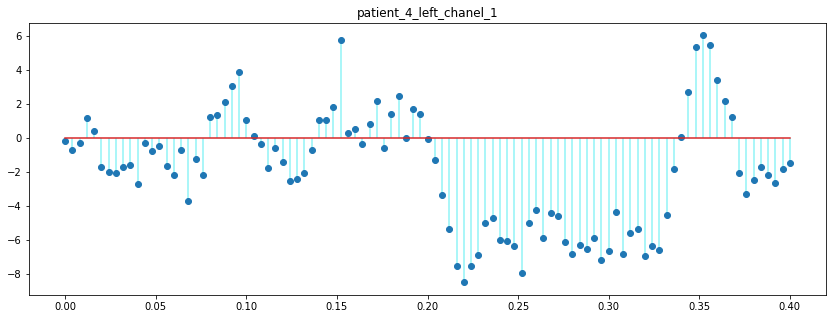

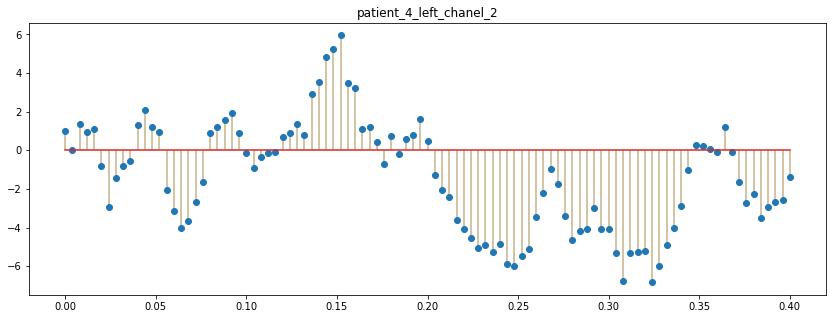

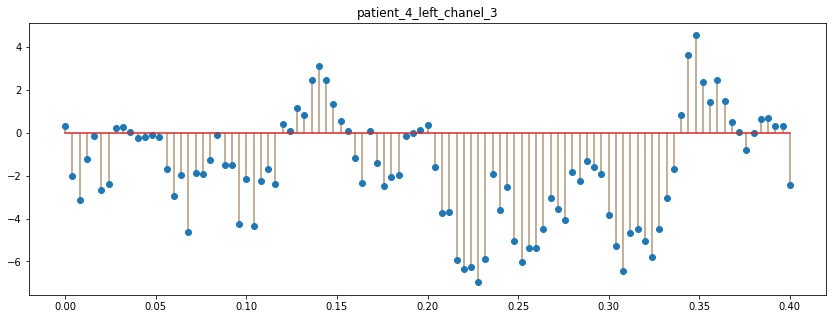

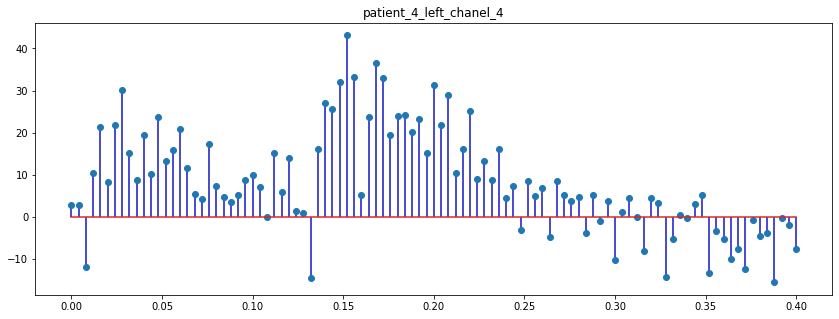

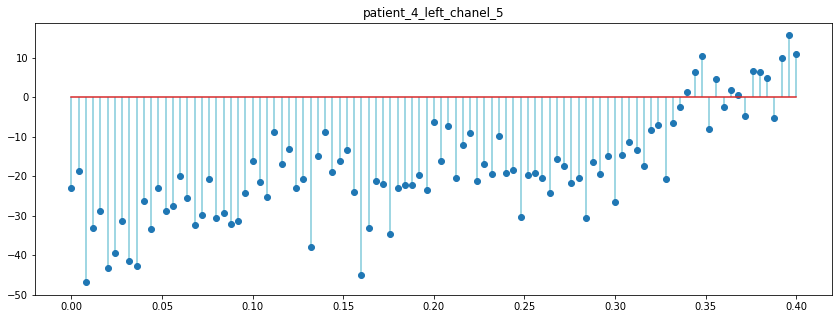

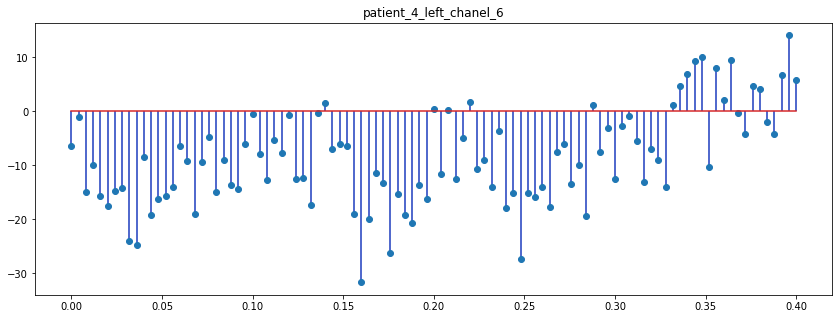

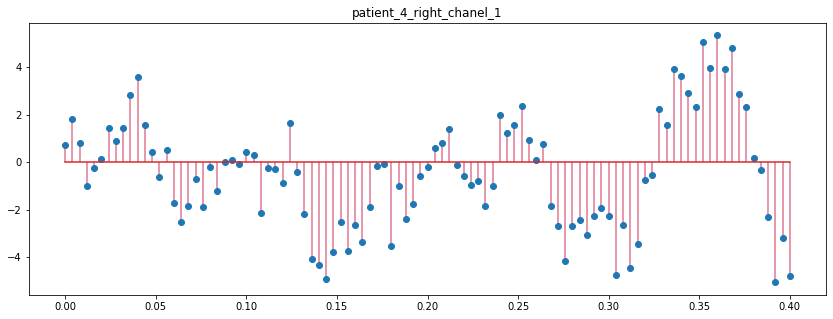

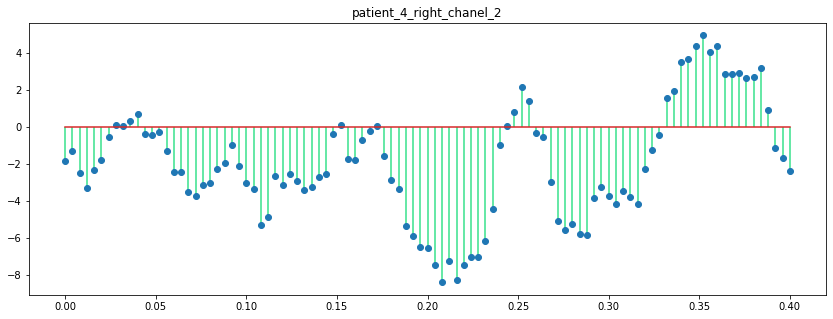

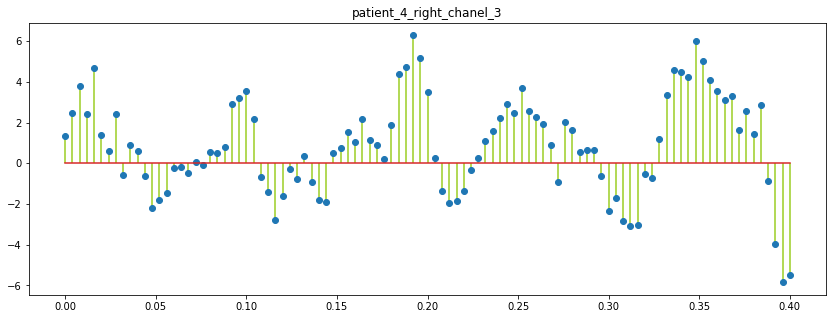

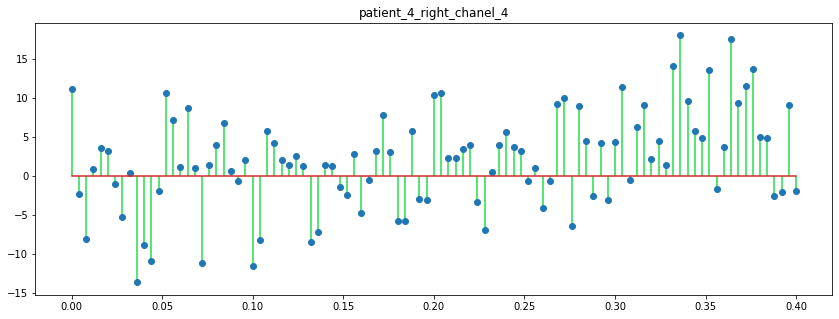

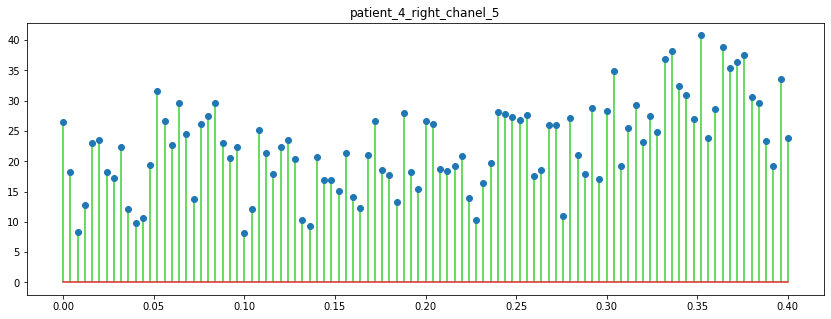

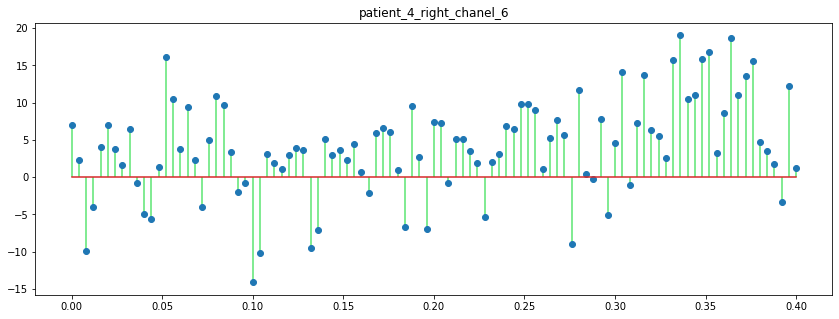

In [ ]:
##Patient 4 signals plot

plot_signals(list(chanels["patient_4"]["left"].values()),"patient_4_left")
plot_signals(list(chanels["patient_4"]["right"].values()),"patient_4_right")


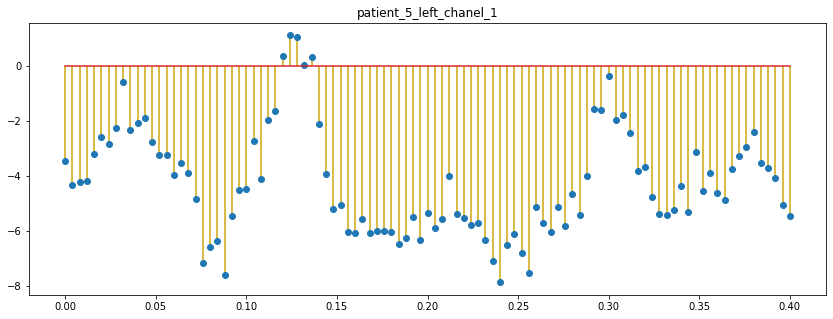

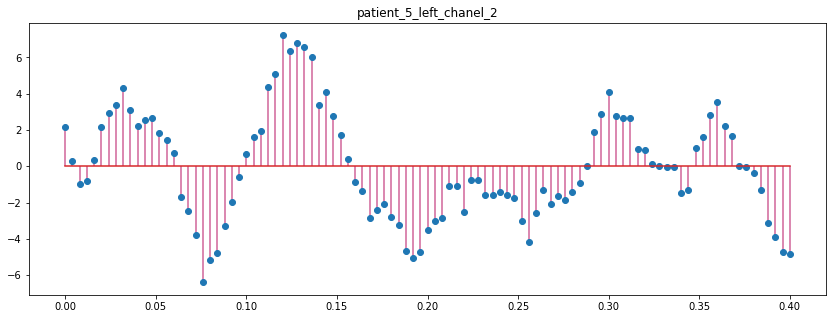

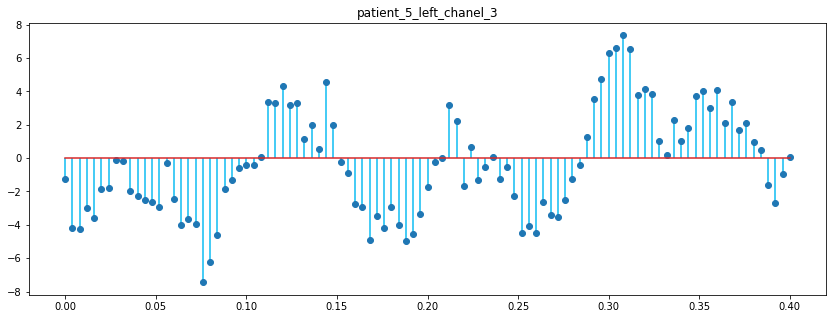

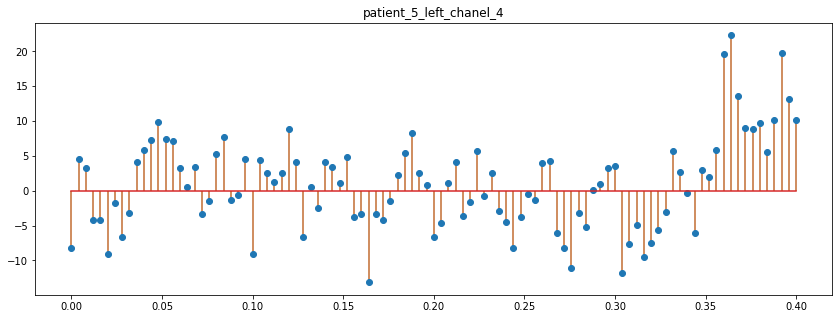

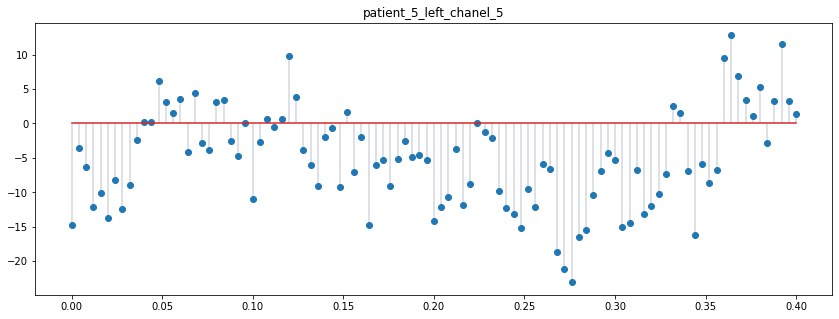

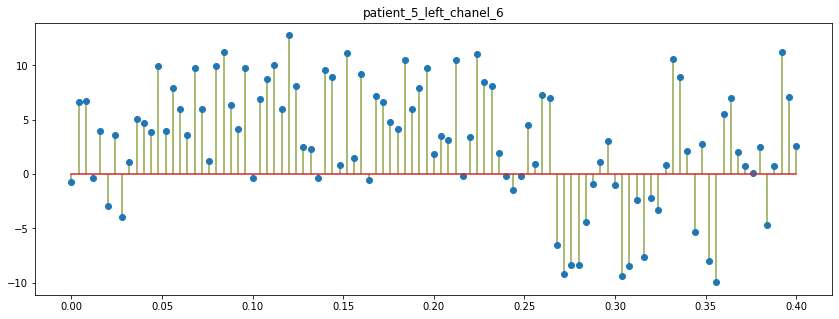

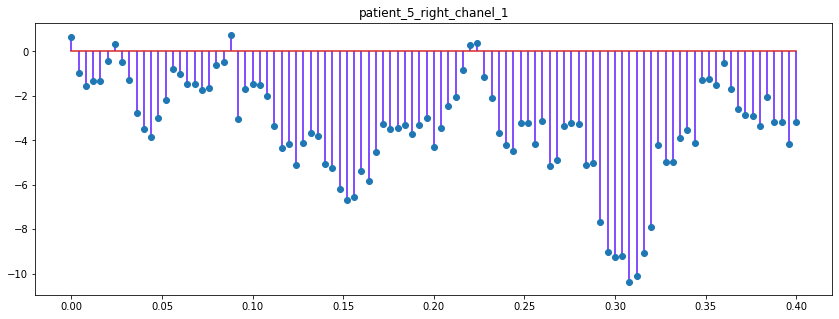

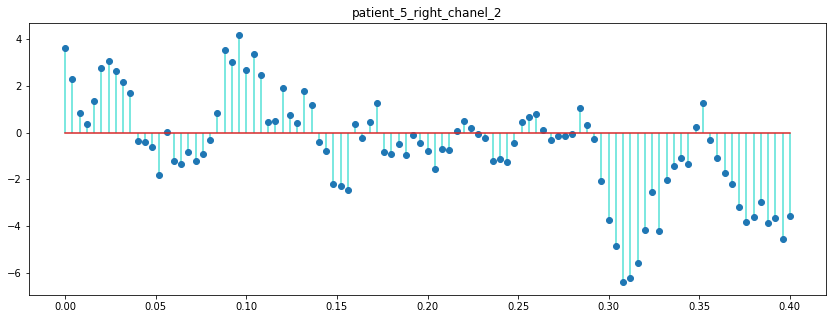

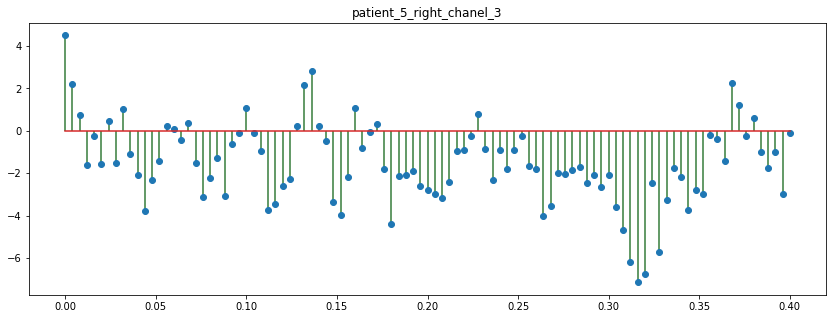

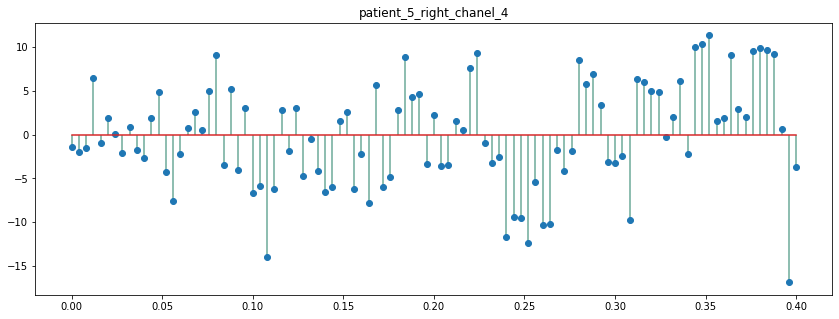

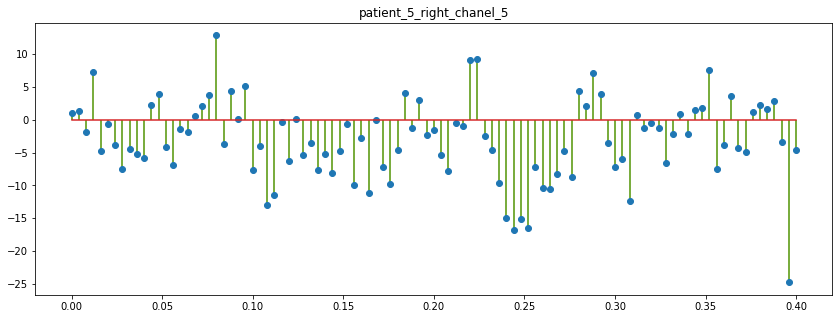

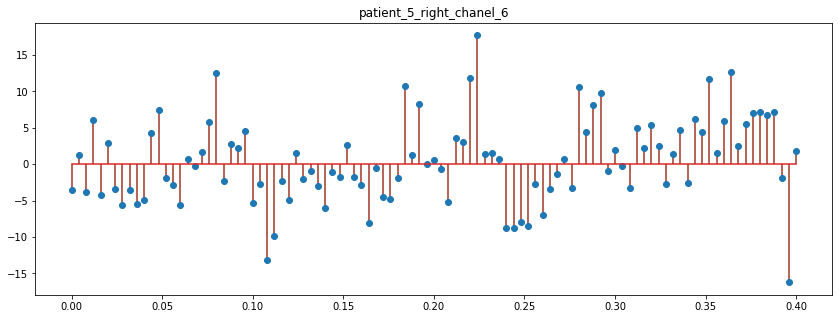

In [ ]:
##Patient 5 signals plot

plot_signals(list(chanels["patient_5"]["left"].values()),"patient_5_left")
plot_signals(list(chanels["patient_5"]["right"].values()),"patient_5_right")

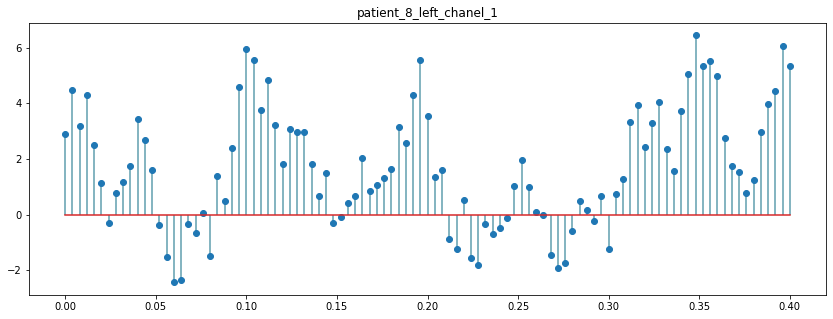

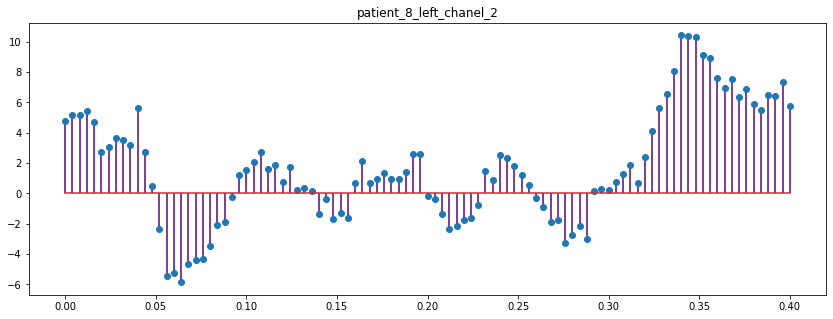

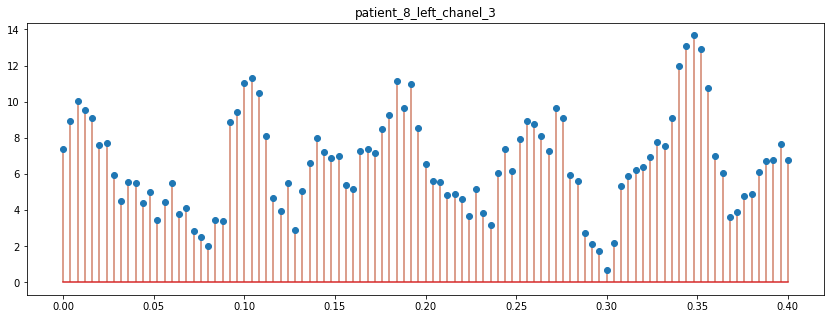

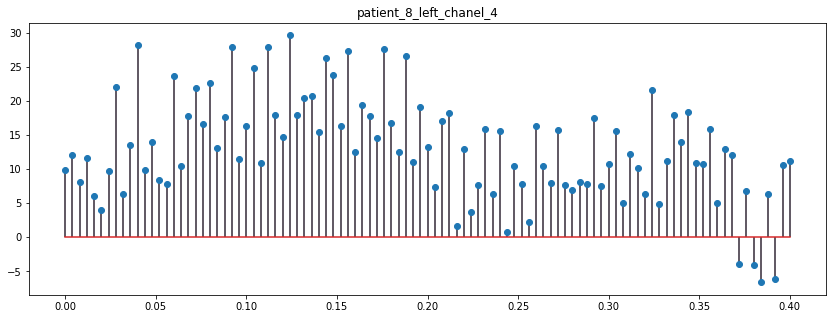

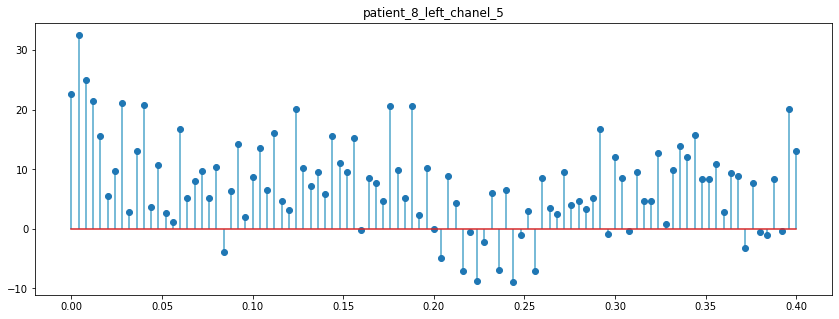

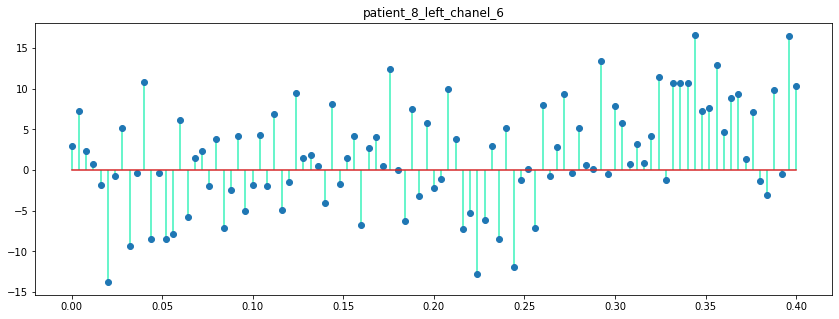

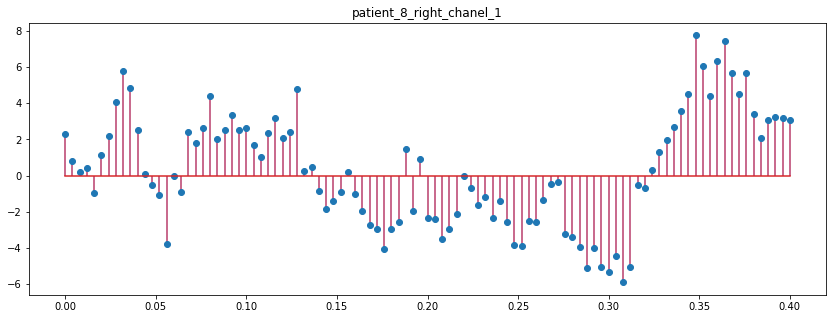

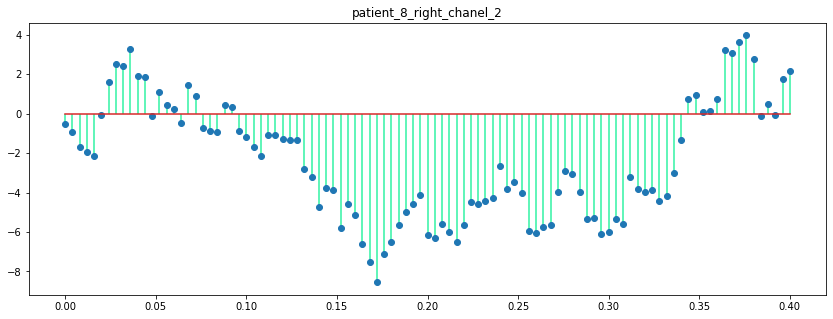

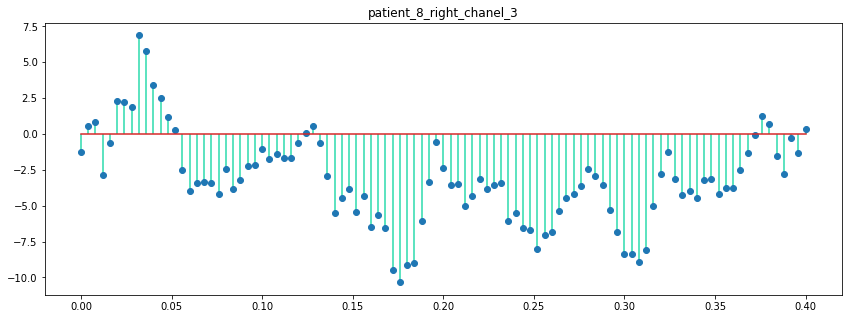

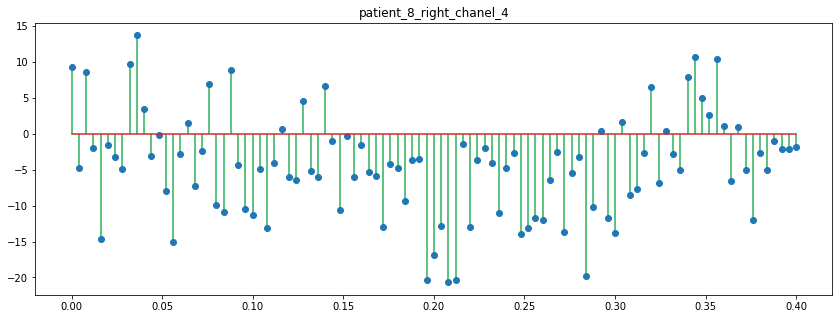

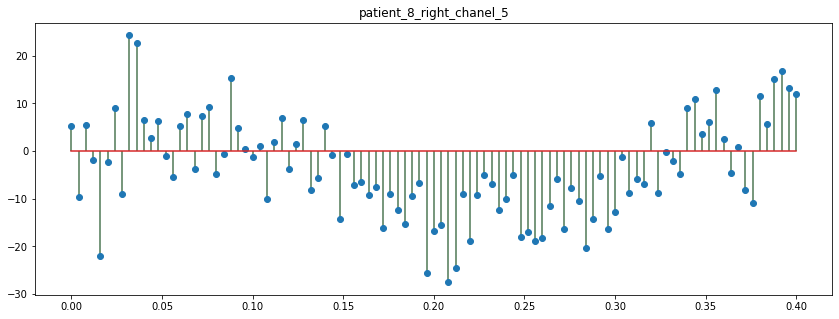

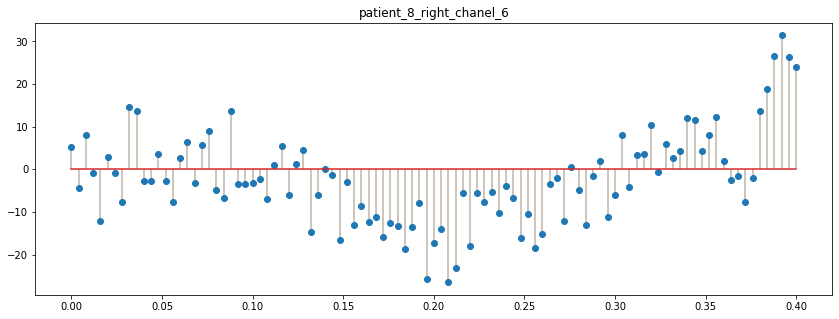

In [ ]:
##Patient 8 signals plot

plot_signals(list(chanels["patient_8"]["left"].values()),"patient_8_left")
plot_signals(list(chanels["patient_8"]["right"].values()),"patient_8_right")